In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# common library
import jax.numpy as jnp
import numpy as np

# a trick to find the next modules
import os
print(os.getcwd())
os.chdir("..")
print(os.getcwd())

# this library
from haiku_geometric.transforms.loader import sample_neighbours,reconstruct_graph_from_subgraphs
from haiku_geometric.datasets.base import DataGraphTuple
import haiku_geometric.analysis.display as disp_utils
import haiku_geometric.datasets.mesh_dataset as mesh_dataset

/home/julien-rsbrg/MLprojects/haiku-geometric-scale-up
/home/julien-rsbrg/MLprojects


TypeError: Type Tuple cannot be instantiated; use tuple() instead

In [ ]:
mesh_dataset = mesh_dataset.MeshDataset(n_subdivision=2)
graph = mesh_dataset.data[0]
disp_utils.draw_datagraph_structure(graph)
print(graph.n_node, graph.n_edge)

ValueError: too many values to unpack (expected 4)

--subgraph graph n°0--
(10, 2)
{0: Array([0. , 0.4], dtype=float32), 1: Array([0. , 0.6], dtype=float32), 2: Array([0. , 0.8], dtype=float32), 3: Array([0.2, 0.6], dtype=float32), 4: Array([0.6, 0.8], dtype=float32), 5: Array([0.8, 0.6], dtype=float32), 6: Array([0.8, 0.8], dtype=float32), 7: Array([1. , 0.4], dtype=float32), 8: Array([1. , 0.6], dtype=float32), 9: Array([1. , 0.8], dtype=float32)}


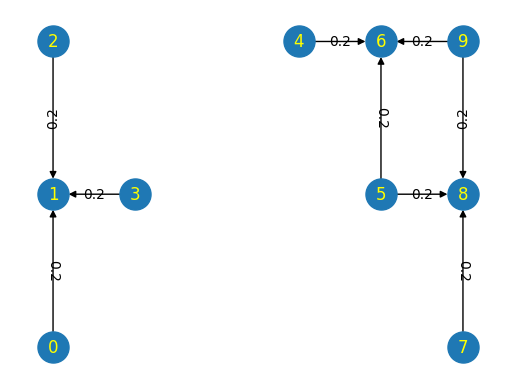

--describe datagraph--
Number of nodes: 10
Number of edges: 9
Nodes features size: 2
Number of training nodes: 3
Average node degree: 0.90

--subgraph graph n°1--
(11, 2)
{0: Array([0. , 0.8], dtype=float32), 1: Array([0.2, 0.6], dtype=float32), 2: Array([0.2, 0.8], dtype=float32), 3: Array([0.2, 1. ], dtype=float32), 4: Array([0.4, 1. ], dtype=float32), 5: Array([0.6, 0.4], dtype=float32), 6: Array([0.6, 0.6], dtype=float32), 7: Array([0.6, 0.8], dtype=float32), 8: Array([0.6, 1. ], dtype=float32), 9: Array([0.8, 0.6], dtype=float32), 10: Array([0.8, 1. ], dtype=float32)}


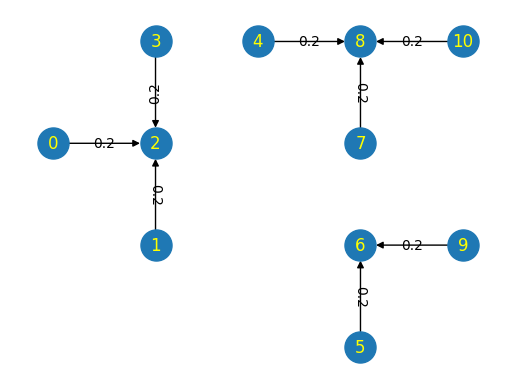

--describe datagraph--
Number of nodes: 11
Number of edges: 8
Nodes features size: 2
Number of training nodes: 3
Average node degree: 0.73



In [ ]:
n_nodes_to_take = 6
input_nodes = np.full((graph.nodes.shape[0],),False)
to_true = np.random.choice(graph.nodes.shape[0],n_nodes_to_take,replace=False)
input_nodes[to_true] = True

subgraphs,indices_taken_nodes_in_original_graph = sample_neighbours(graph,num_neigbours=[2,4], batch_size=3,input_nodes=input_nodes,return_index=True)


for i,subgraph in enumerate(subgraphs.data):
    print(f'--subgraph graph n°{i}--')
    disp_utils.draw_datagraph_structure(subgraph)
    disp_utils.describe_datagraph(subgraph)

--reconstructed graph--
(17, 2)
{0: array([0. , 0.4], dtype=float32), 1: array([0. , 0.6], dtype=float32), 2: array([0. , 0.8], dtype=float32), 3: array([0.2, 0.6], dtype=float32), 4: array([0.6, 0.8], dtype=float32), 5: array([0.8, 0.6], dtype=float32), 6: array([0.8, 0.8], dtype=float32), 7: array([1. , 0.4], dtype=float32), 8: array([1. , 0.6], dtype=float32), 9: array([1. , 0.8], dtype=float32), 10: array([0.2, 0.8], dtype=float32), 11: array([0.2, 1. ], dtype=float32), 12: array([0.4, 1. ], dtype=float32), 13: array([0.6, 0.4], dtype=float32), 14: array([0.6, 0.6], dtype=float32), 15: array([0.6, 1. ], dtype=float32), 16: array([0.8, 1. ], dtype=float32)}


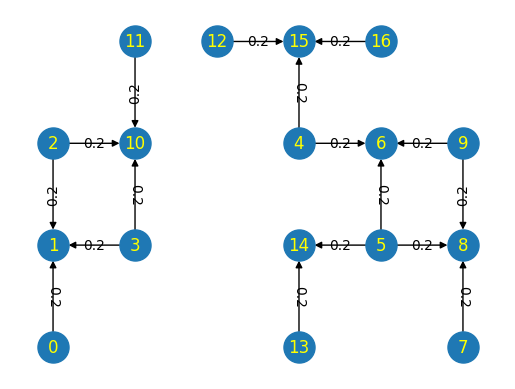

In [ ]:
print('--reconstructed graph--')
reconstructed_graph = reconstruct_graph_from_subgraphs(subgraphs, indices_taken_nodes_in_original_graph=indices_taken_nodes_in_original_graph)
disp_utils.draw_datagraph_structure(reconstructed_graph) 